In [1]:
using PyPlot

_Ejercicio 1_: Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$ usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos. Nota: El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de Euler que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [2]:
#Usamos el metodo de Euler para varias variables que presentó el profesor
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [3]:
#Usamos el Método de Runge-Kutta de orden 4 para varias variables, que hicimos alguna tarea anterior, con base en el dado por el profesor
function RK(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
     end
     return listx
end

RK (generic function with 1 method)

In [4]:
#si resolvemos d2x/dt2+dx/dt+x=0, obtenemos la función para resolver con k=1 y m=1
r(x,t)=[x[2], -1.0*x[1]-1.0*x[2]]

r (generic function with 1 method)

In [5]:
#Se graficará sobre el intervalo [0,20] con h = 0.1
list=0:0.1:20;
#En EspEuler se guardan las soluciones con Euler y se dan como condiciones iniciales x(0)=1 y u(0)=0
EspEuler=euler(r,list,[1,0]);

In [6]:
#Se graficará sobre el intervalo [0,20] con h = 0.1
list=0:0.1:20;
#En EspRK se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=1 y u(0)=0
EspRK=RK(r,list,[1,0]);

In [7]:
#Se guardan las soluciones en dos lists por método
listx1euler=map(x->x[1],EspEuler);
listx2euler=map(x->x[2],EspEuler);
listx1RK=map(x->x[1],EspRK);
listx2RK=map(x->x[2],EspRK);

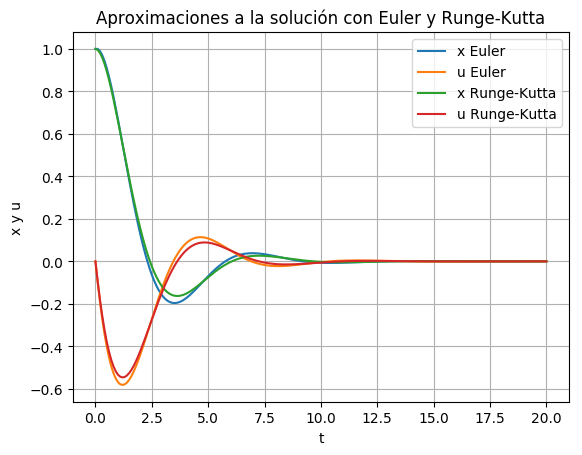

In [8]:
#Se grafican las aproximaciones a posición y velocidad con Euler y Runge-Kutta
xlabel("t")
ylabel("x y u")
title("Aproximaciones a la solución con Euler y Runge-Kutta")
grid("on")
plot(list,listx1euler, label="x Euler");
plot(list,listx2euler, label="u Euler");
plot(list,listx1RK, label="x Runge-Kutta");
plot(list,listx2RK, label="u Runge-Kutta");
legend();

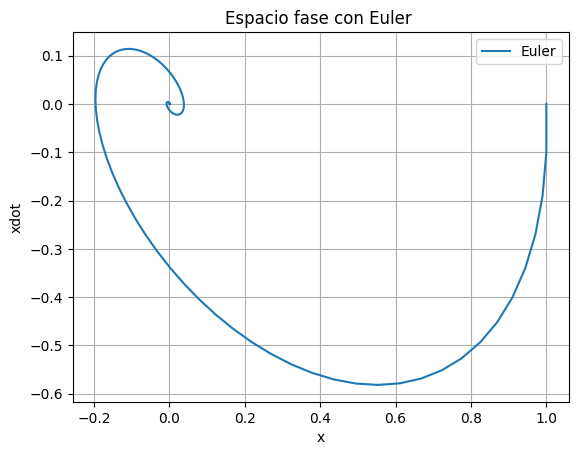

In [9]:
#Espacio fase con Euler
xlabel("x")
ylabel("xdot")
title("Espacio fase con Euler ")
grid("on")
plot(listx1euler,listx2euler, label="Euler");
legend();

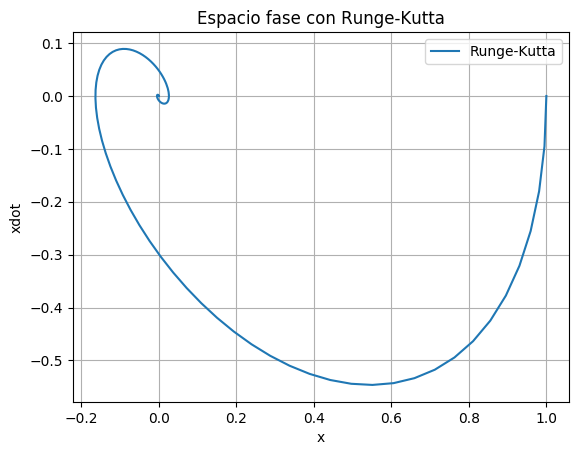

In [10]:
#Espacio fase con Runge-Kutta
xlabel("x")
ylabel("xdot")
title("Espacio fase con Runge-Kutta")
grid("on")
plot(listx1RK,listx2RK, label="Runge-Kutta");
legend();

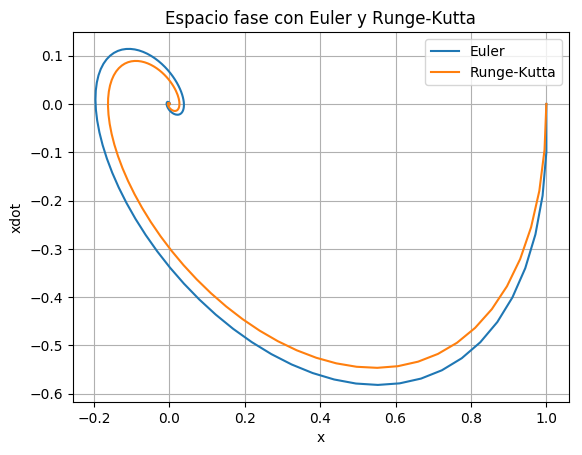

In [11]:
#Espacio fase con Euler y Runge-Kutta
xlabel("x")
ylabel("xdot")
title("Espacio fase con Euler y Runge-Kutta")
grid("on")
plot(listx1euler,listx2euler, label="Euler");
plot(listx1RK,listx2RK, label="Runge-Kutta");
legend();

_Ejercicio 2_: Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [12]:
#si resolvemos d2theta/dtheta2=-sin(theta), obtenemos la función para resolver con l=1 y g=1
y(x,t)=[x[2], -sin(x[1])];

In [13]:
#Esta función regresa un número aleatorio en el intervalo [-w,w]
function randNum(w)
 return w*(2*rand()-1);
end;

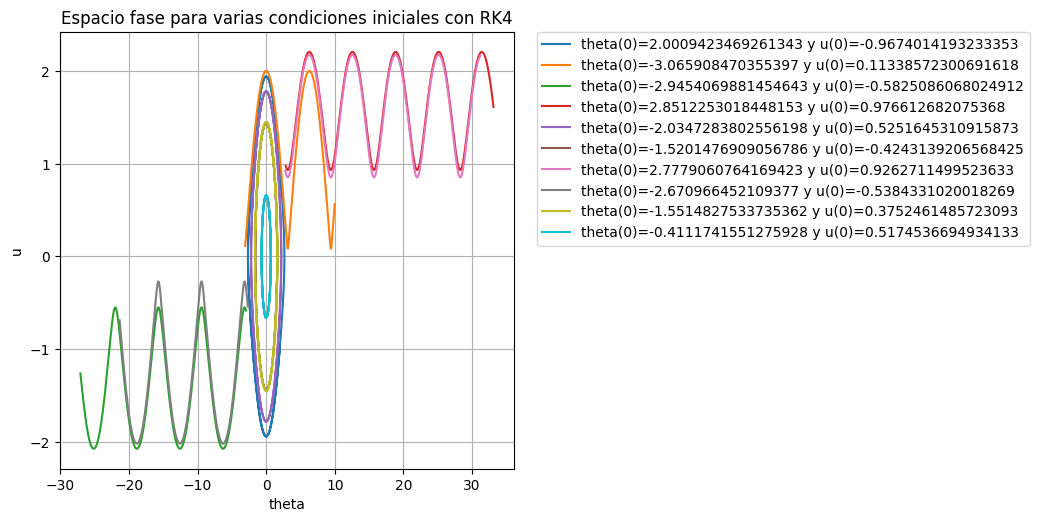

In [14]:
#Espacio fase para varias condiciones iniciales con Runge-Kutta
xlabel("theta")
ylabel("u")
title("Espacio fase para varias condiciones iniciales con RK4")
grid("on")

#Se graficará sobre el intervalo [0,20] con h = 0.1
list=0:0.1:20;

#Se usan diez condiciones iniciales (porque sólo hay diez colores distintos con los que se puede graficar)

for i in 1:10
    #Se hacen 10 condiciones iniciales aleatorias, una para theta(0) y otra para thetadot(0)
    a=randNum(pi);
    b=randNum(1);
    
    #Se aplica Runge-Kutta y se guarda en dos lists
    vec=RK(y,list,[a,b]);
    listx1rk=map(x->x[1],vec);
    listx2rk=map(x->x[2],vec);
    plot(listx1rk,listx2rk, label="theta(0)=$a y u(0)=$b");
end;

#Con esto se mueven los labels a la derecha de la gráfica
ax = axes()
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])

_Ejercicio 3_: Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [16]:
#Utilizamos nuevamente Runge-Kutta de orden 4... pero para este sistema; la función recibe g(x,t), condición inicial a, primer tiempo t1, último tiempo tf y el tamaño de cada subintervalo h

function RK4(g, a, ti, tf, h)
    #timeArray contiene el intervalo de tiempo dividido en round((tf-ti)/h) subintervalos
    #xArray tiene el mismo número de entradas que timeArray, pero con puros ceros
    
    timeArray = linspace(ti, tf, round((tf-ti)/(h)));
    xArray = zeros(length(timeArray));
    
    #El primer elemento de xArray es la condición inicial
    xArray[1] = a;
    
    #En el for se calculan los ks de Runge-Kutta y 
    #se llenan las entradas de xArray con x[n+1]=x[n]+(h/6)(k1+2k2+2k3+k4)
    
    for i in 1:length(timeArray)-1
        k1 = g(xArray[i], timeArray[i]);
        k2 = g(xArray[i]+(h/2)*k1, timeArray[i]+(h/2));
        k3 = g(xArray[i]+(h/2)*k2, timeArray[i]+(h/2));
        k4 = g(xArray[i]+h*k3, timeArray[i+1]);
        xArray[i+1] = xArray[i]+(h/6)*(k1+2*k2+2*k3+k4);
    end
    
    #Se regresan los dos arrays
    return timeArray, xArray; 
end;

In [17]:
#Se define la función sobre la que se va a aplicar Runge-Kutta
function f(x,t)
    return x*x-1;
end;

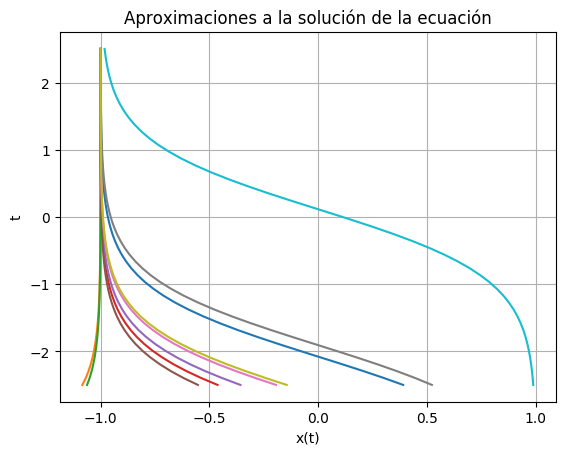

In [18]:
xlabel("x(t)")
ylabel("t")
title("Aproximaciones a la solución de la ecuación")
grid("on")
for i in 1:10
    #Se hacen 10 condiciones iniciales aleatorias, una para theta(0) y otra para thetadot(0)
    #Se aplica Runge-Kutta de orden 4 con cuatro tamaños de subintervalo, para la condición inicial x(0)=4 en g
    
    a = randNum(1.2);
    
    #Se grafica en el intervalo [-2.5, 2.5] para "t" y la condición incial es sobre x(t=-2.5)
    
    (timeArray, xArray) = RK4(f, a, -2.5, 2.5, 0.1);
    plot(xArray,timeArray, label="theta(0)=$a");
end;

_Ejercicio 4_: También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$ cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.#Se define la función sobre la que se va a aplicar Runge-Kutta
function g(x,t)
    return x*x;
end;

In [20]:
#Se define la función sobre la que se va a aplicar Runge-Kutta
function g(x,t)
    return x*x;
end;

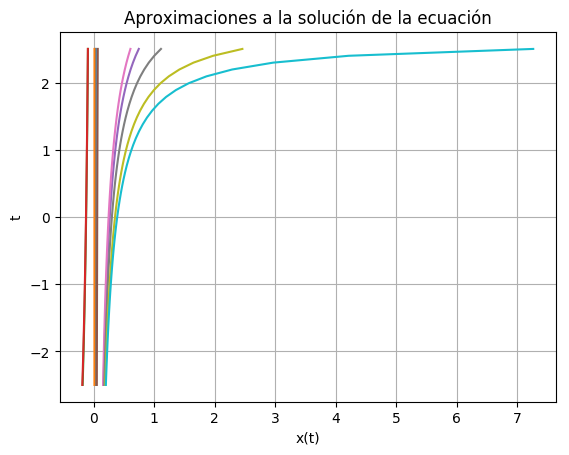

In [21]:
#Se hace practicamente lo mismo que en el ejercicio anterior, sólo que cambia el valor "a"
xlabel("x(t)")
ylabel("t")
title("Aproximaciones a la solución de la ecuación")
grid("on")
for i in 1:10
    #Se hacen 10 condiciones iniciales aleatorias, una para theta(0) y otra para thetadot(0)
    #Se aplica Runge-Kutta de orden 4 con cuatro tamaños de subintervalo, para la condición inicial x(0)=4 en g
    a = randNum(0.2);
    
    #Se grafica en el intervalo [-2.5, 2.5] para t y la condición incial es sobre x(t=-2.5)
    
    (timeArray, xArray) = RK4(g, a, -2.5, 2.5, 0.1);
    plot(xArray,timeArray, label="theta(0)=$a");
end;

_Ejercicio 5_: Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a &amp; b \\ c &amp; d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
$a=b=1$, $c=d=0$
$a=b=-1$, $c=d=0$
$a=1$, $b=-2$, $c=d=0$
$a=1$, $b=-0.5$, $c=d=0$
$a=d=0$, $b=-c=1$
$a=d=1$, $b=-c=1$
$a=d=-1$, $b=-c=1$
$a=d=-1$, $b=-c=-1$
$a=b=1$, $b=4,c=-2$
$a=b=d=-1$, $c=0$

In [22]:
#Se define la función para resolver 
d(x,t)=[x[1]+x[2], 0]

d (generic function with 1 method)

In [23]:
#Se graficará sobre el intervalo [0,20] con h = 0.1
list=0:0.1:20;
#En EspRK se guardan las soluciones con Runge-Kutta y se dan como condiciones iniciales x(0)=1 y u(0)=0
EspRK=RK(d,list,[1,0]);

In [24]:
listx1RK=map(x->x[1],EspRK);
listx2RK=map(x->x[2],EspRK);

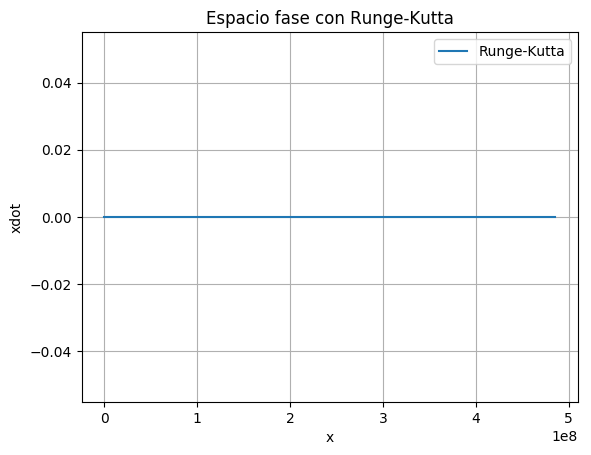

In [25]:
#Espacio fase con Runge-Kutta
xlabel("x")
ylabel("xdot")
title("Espacio fase con Runge-Kutta")
grid("on")
plot(listx1RK,listx2RK, label="Runge-Kutta");
legend();